In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
797,2020-06-27,United Kingdom,309066.0,309360.0,43429.0,43414.0,-294.0,15.0
798,2020-06-27,Germany,193228.0,193243.0,8970.0,8954.0,-15.0,16.0
799,2020-06-27,Iran,218037.0,217724.0,10254.0,10130.0,313.0,124.0
800,2020-06-27,Turkey,194489.0,194511.0,5069.0,5065.0,-22.0,4.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2503.5236907730673
RMSE =  5921.4020667751465


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  320.139650872818
RMSE =  732.7560347644982


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  12613.177215189873
RMSE =  15761.34663132917
-- World performances for deaths --
MAPE =  1600.2911392405063
RMSE =  1960.464492235566


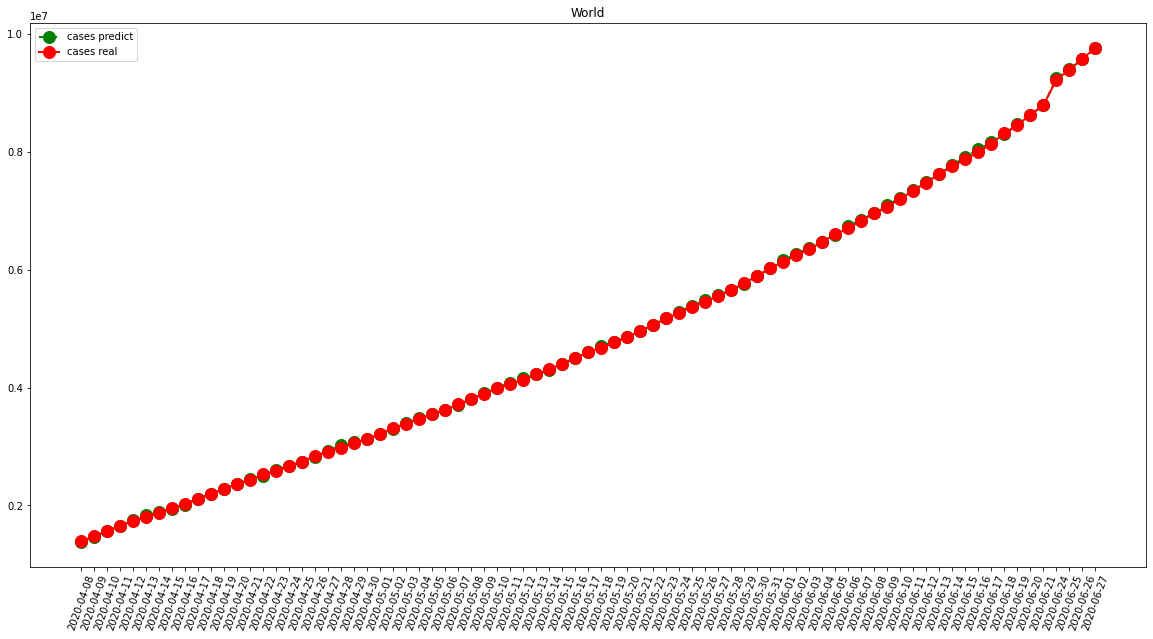

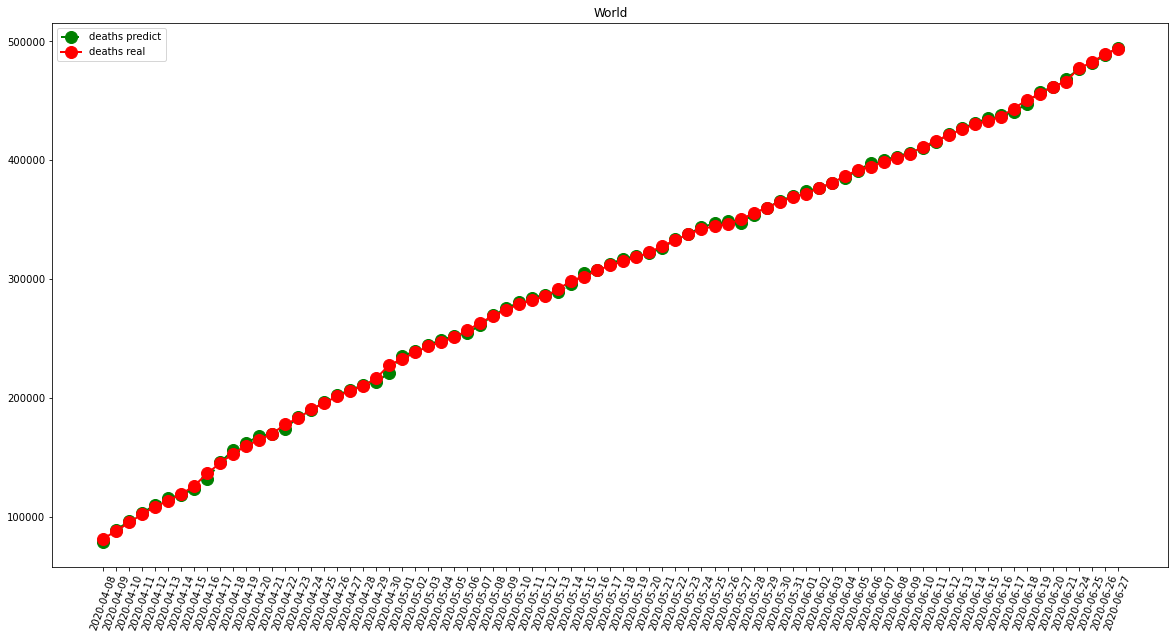

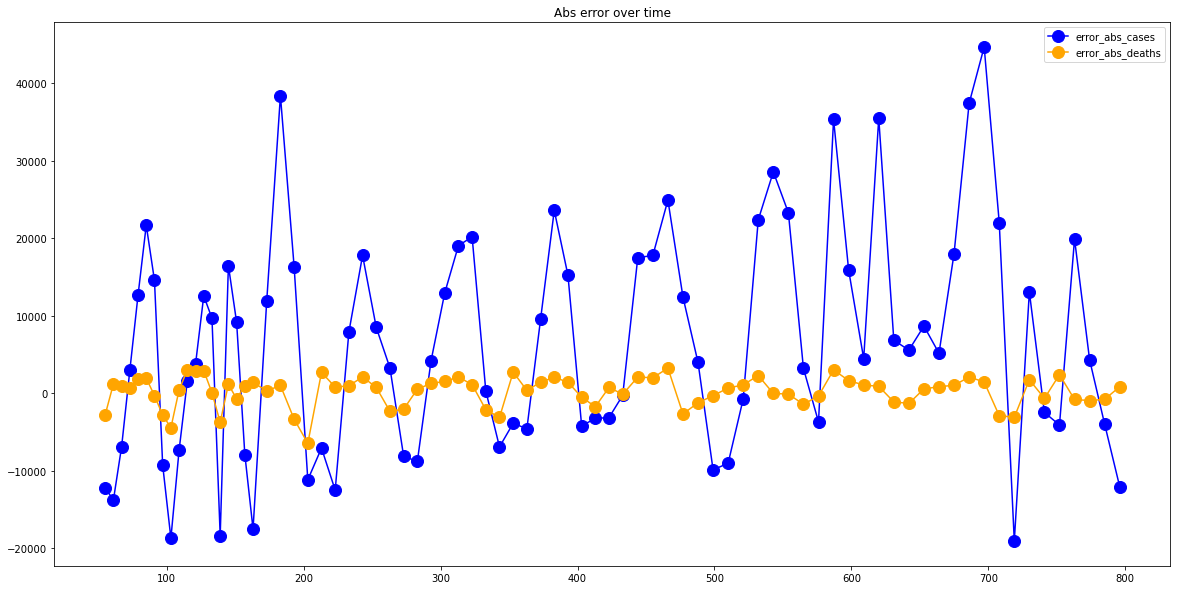

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  911.6629213483146
RMSE =  1513.0198614438593
-- France performances for deaths --
MAPE =  196.13483146067415
RMSE =  354.98010705459876


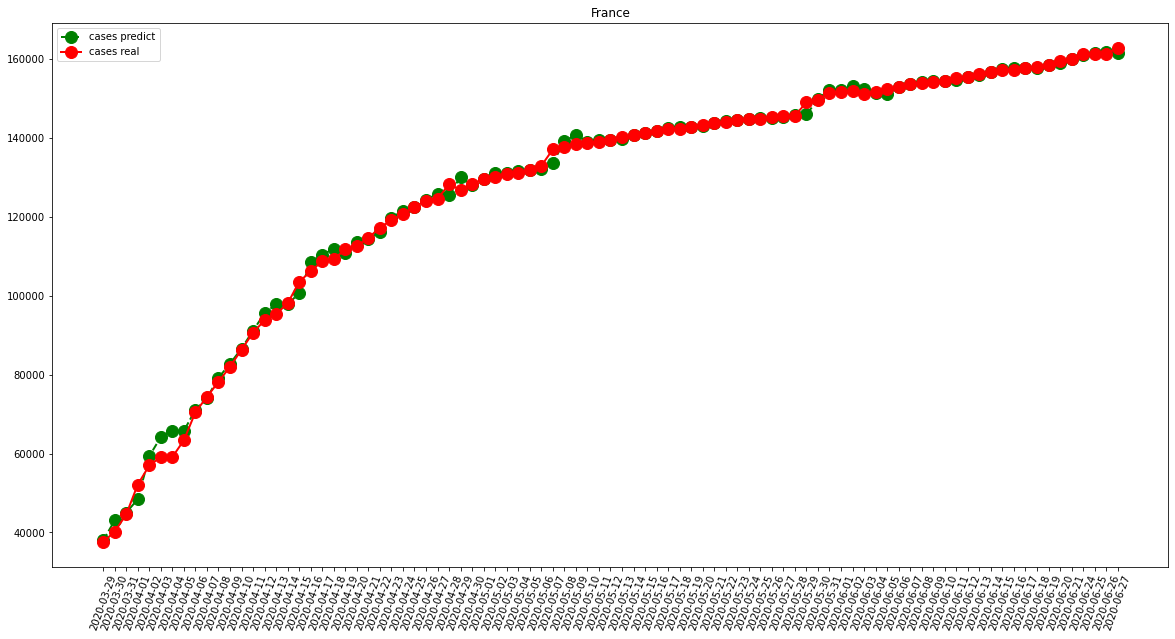

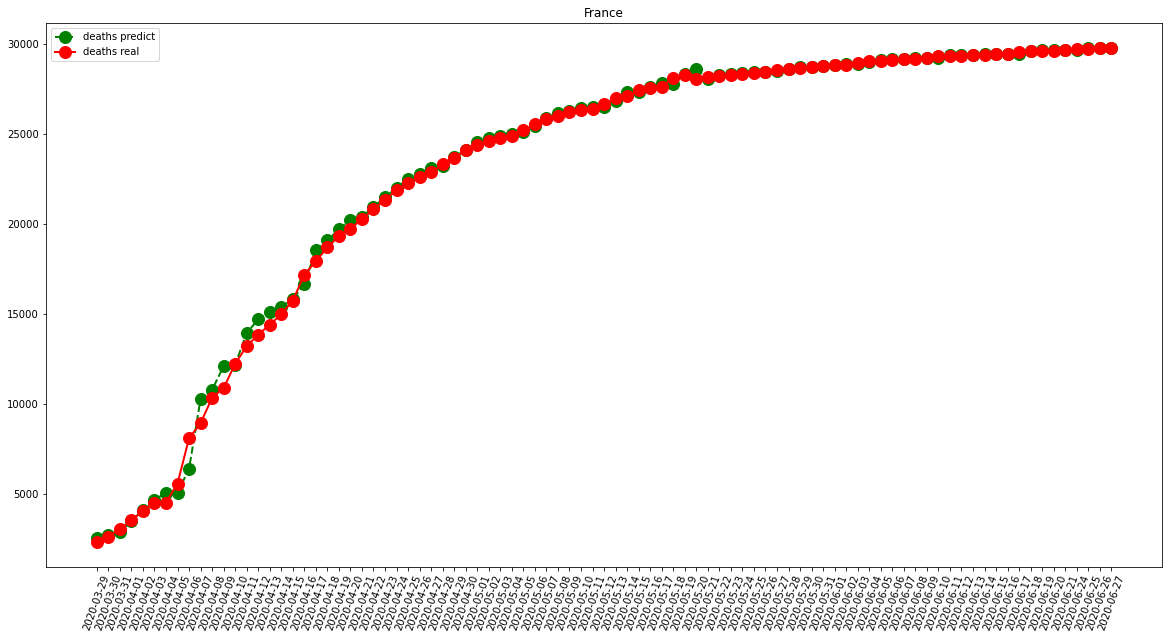

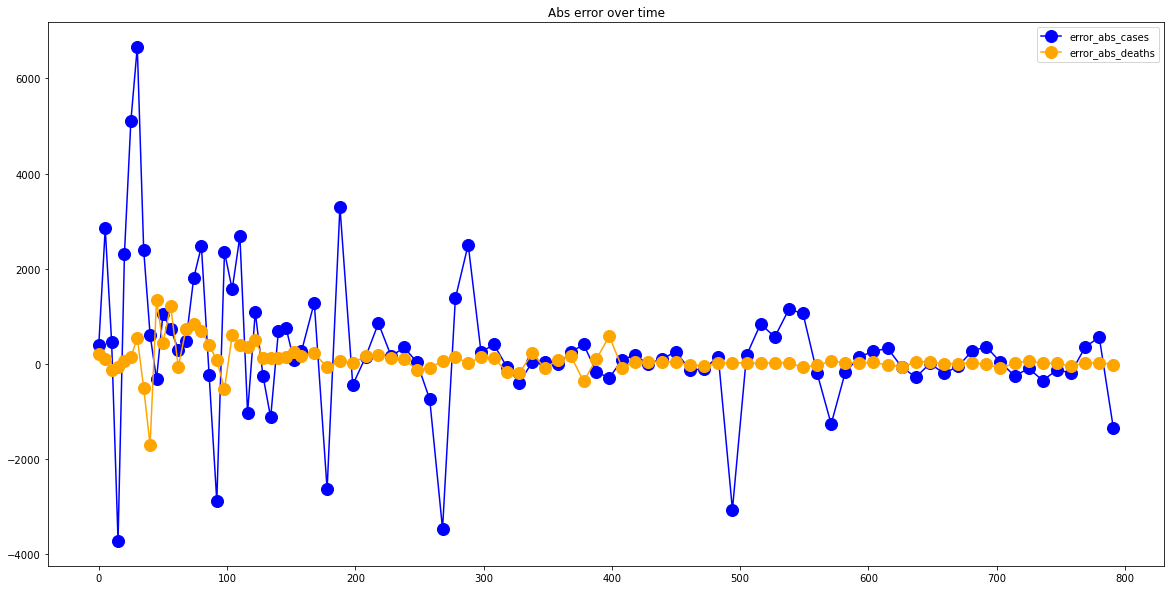

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  399.3820224719101
RMSE =  572.2275515793668
-- Italy performances for deaths --
MAPE =  106.20224719101124
RMSE =  313.30381564685166


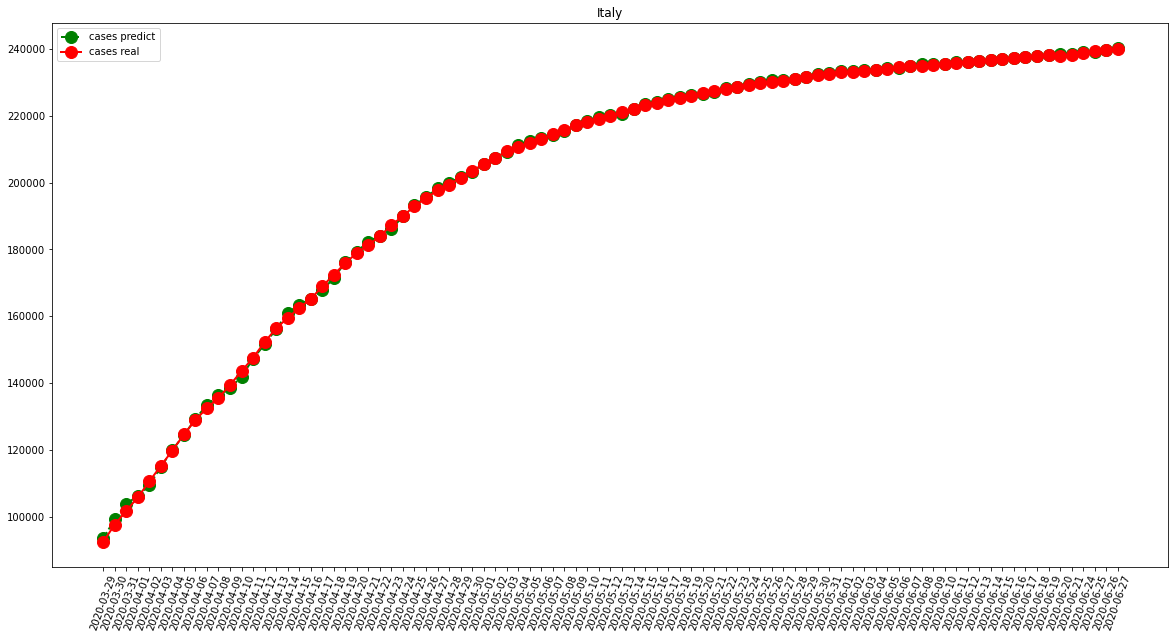

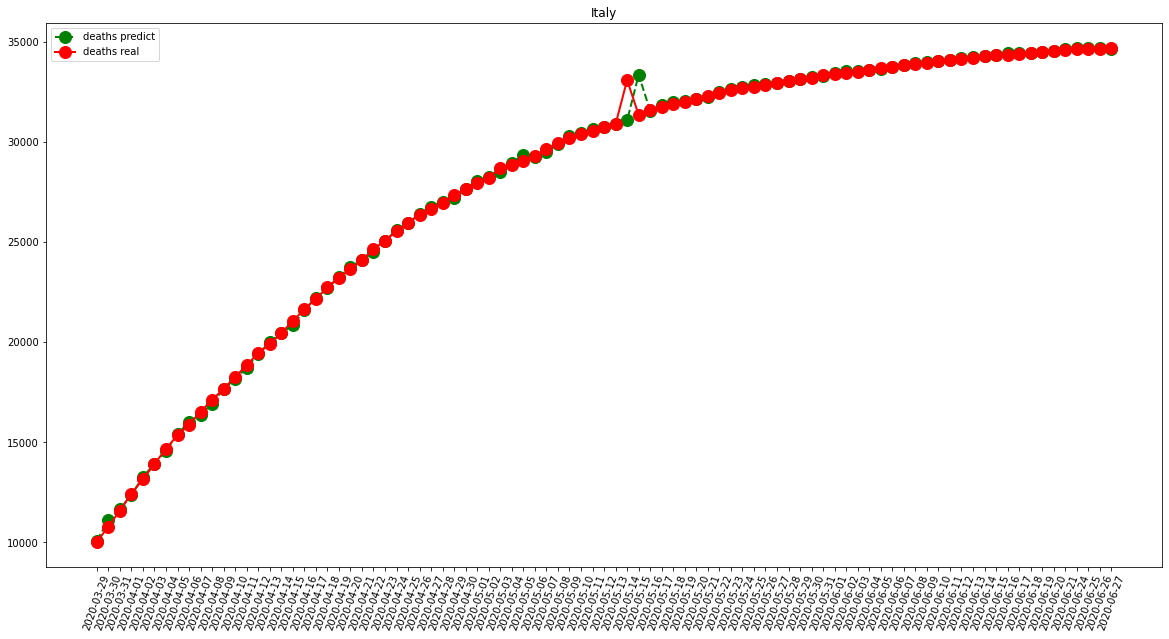

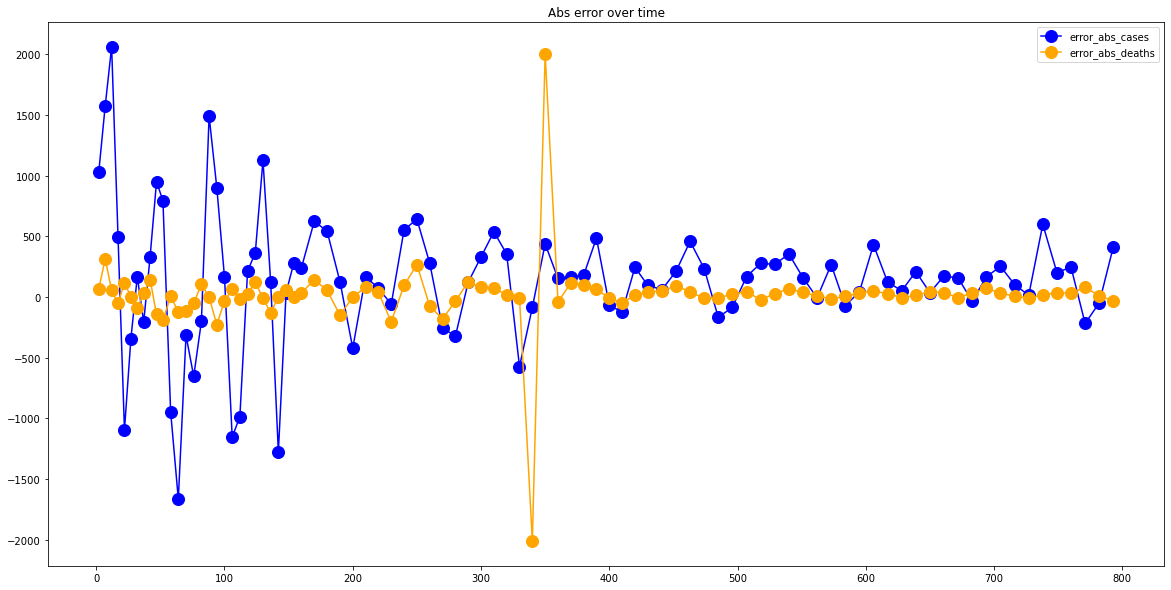

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  920.9213483146067
RMSE =  2165.8753219223768
-- Spain performances for deaths --
MAPE =  201.9438202247191
RMSE =  430.196832399707


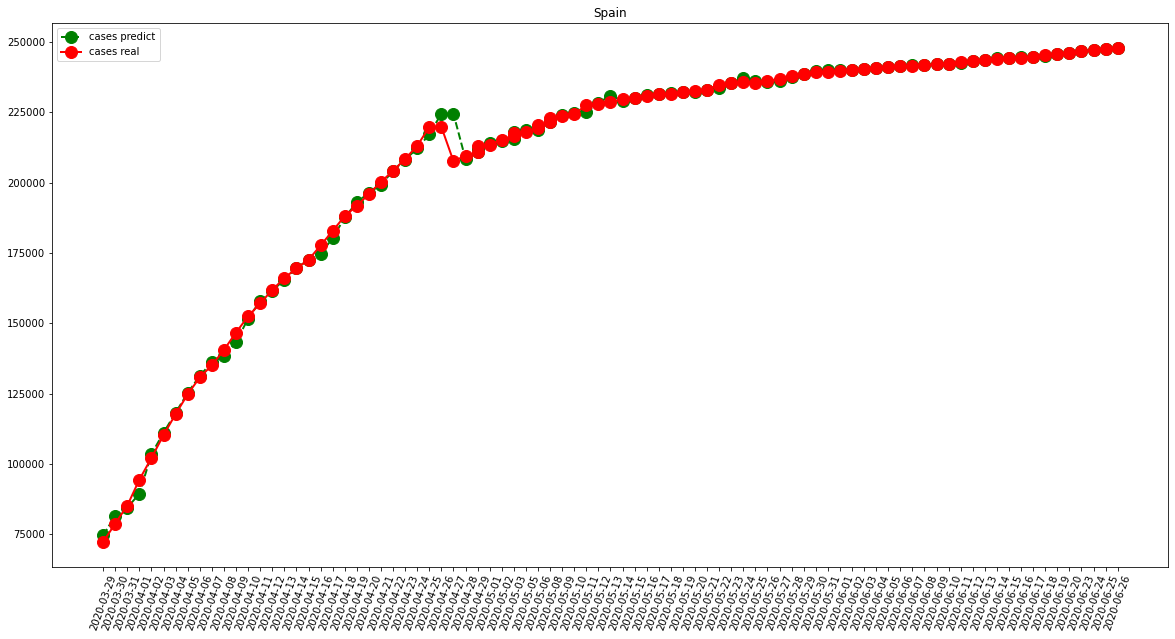

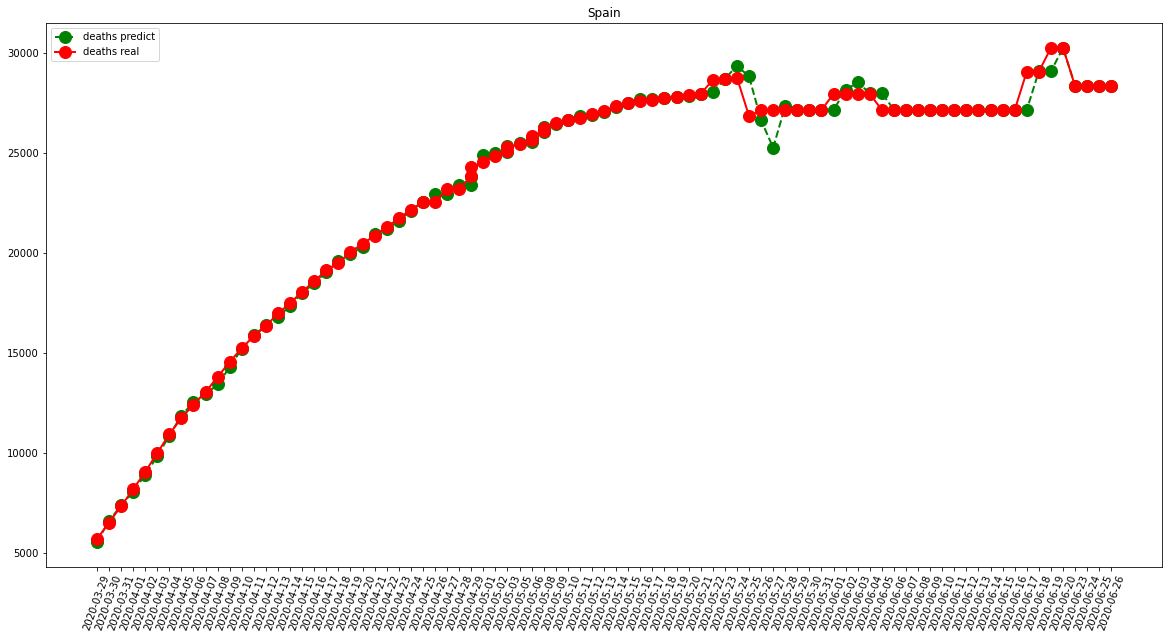

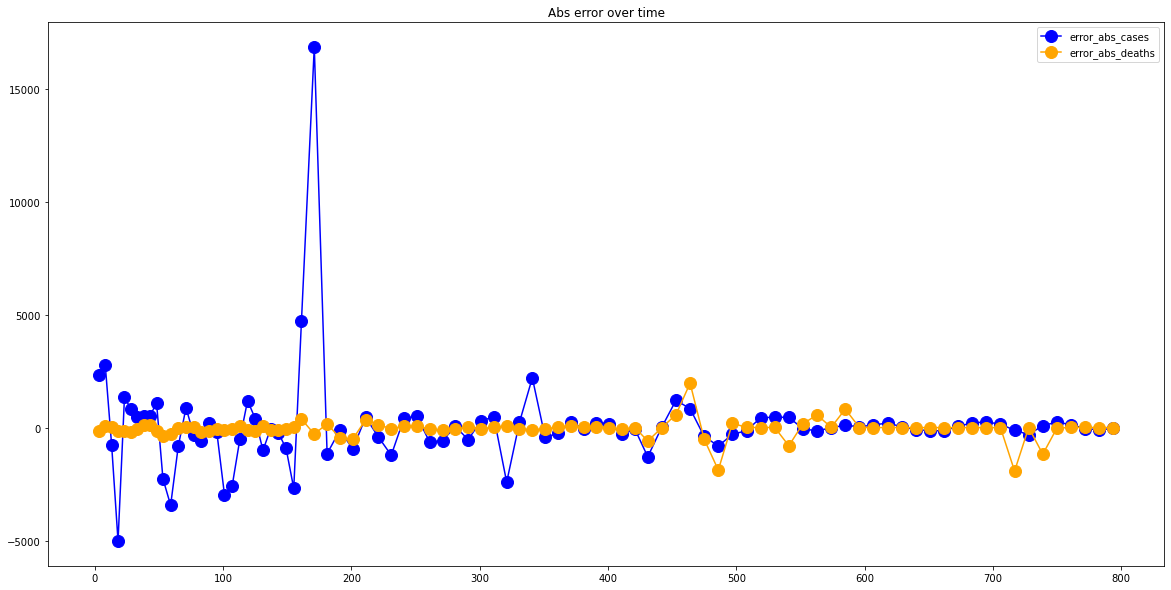

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4727.651685393258
RMSE =  6545.626041938149
-- United States performances for deaths --
MAPE =  534.2359550561798
RMSE =  789.7881880747976


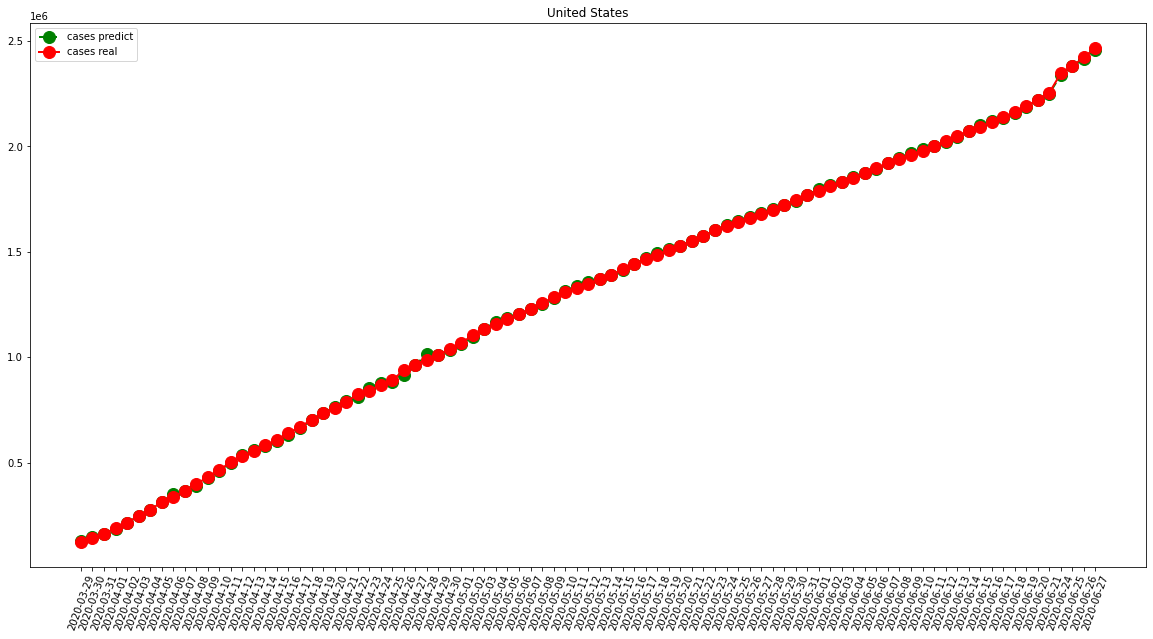

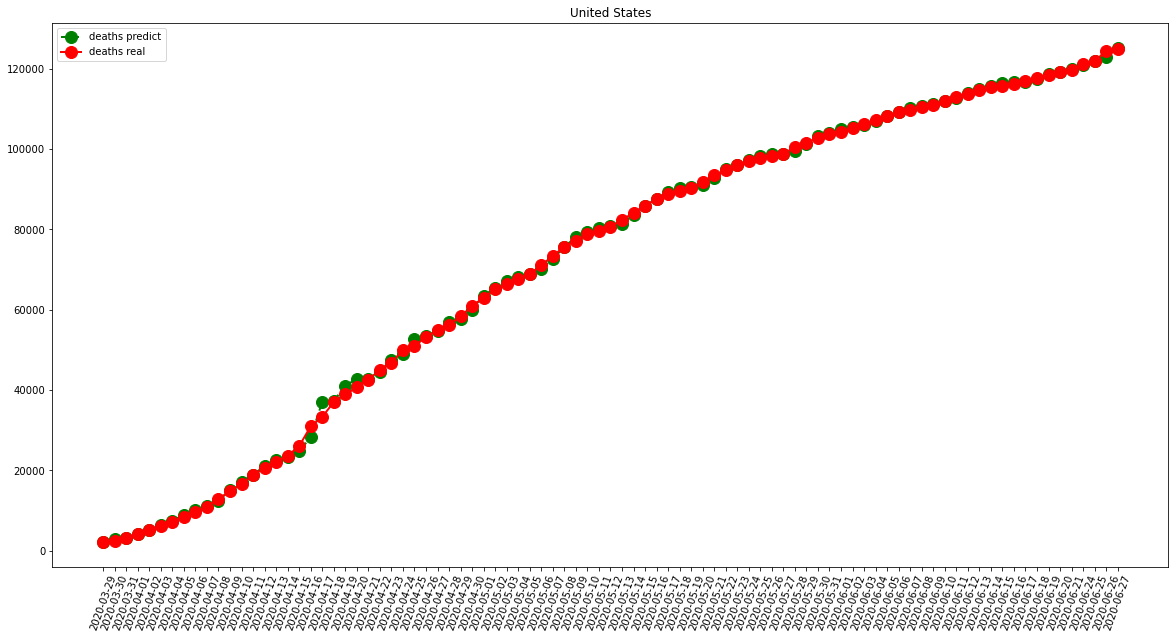

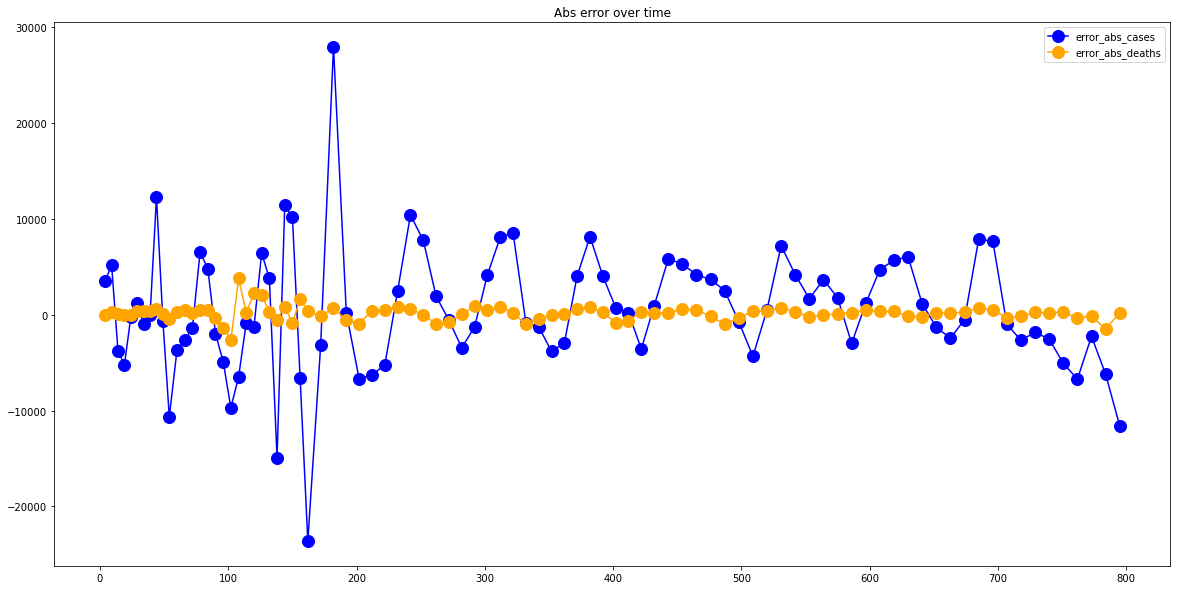

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  95.64044943820225
RMSE =  124.21764154865488
-- China performances for deaths --
MAPE =  41.943820224719104
RMSE =  166.33075887614595


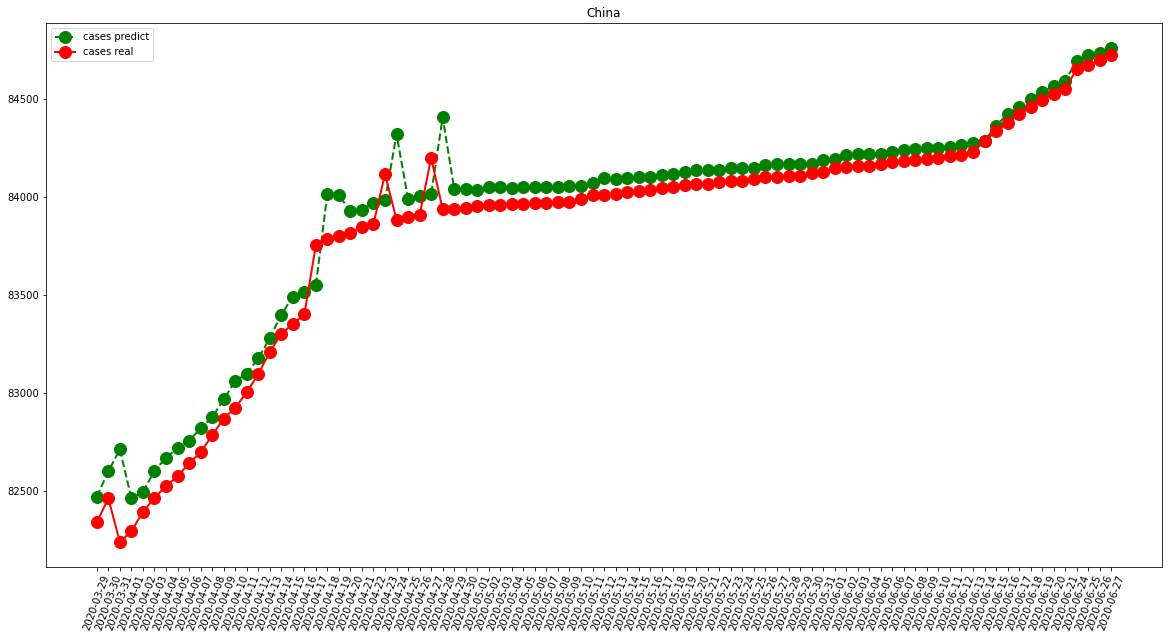

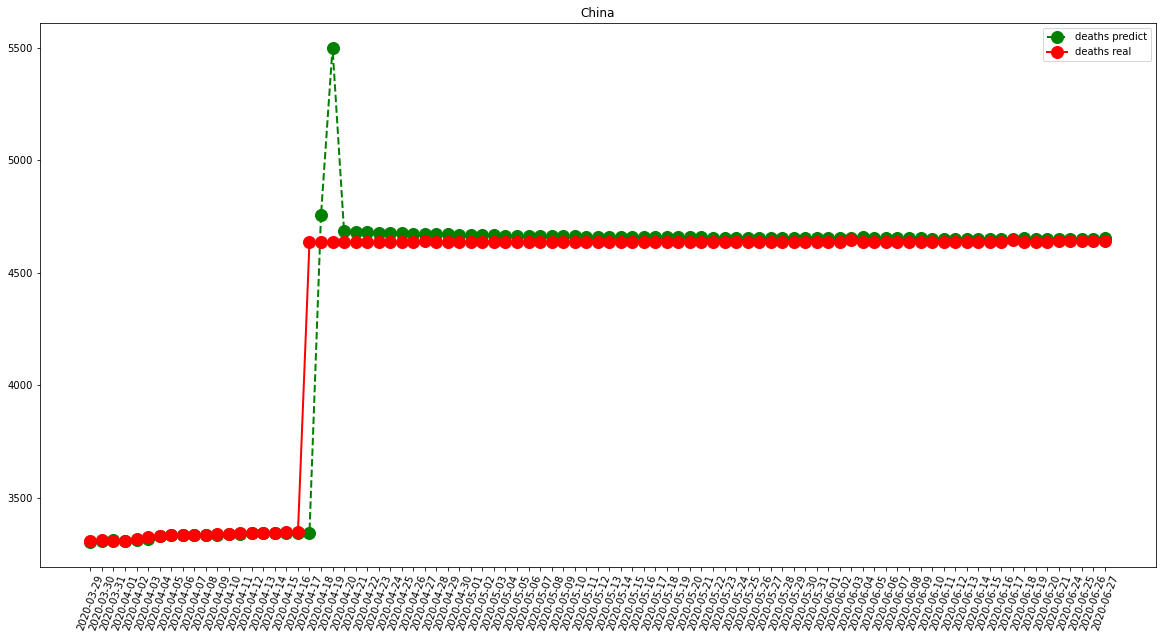

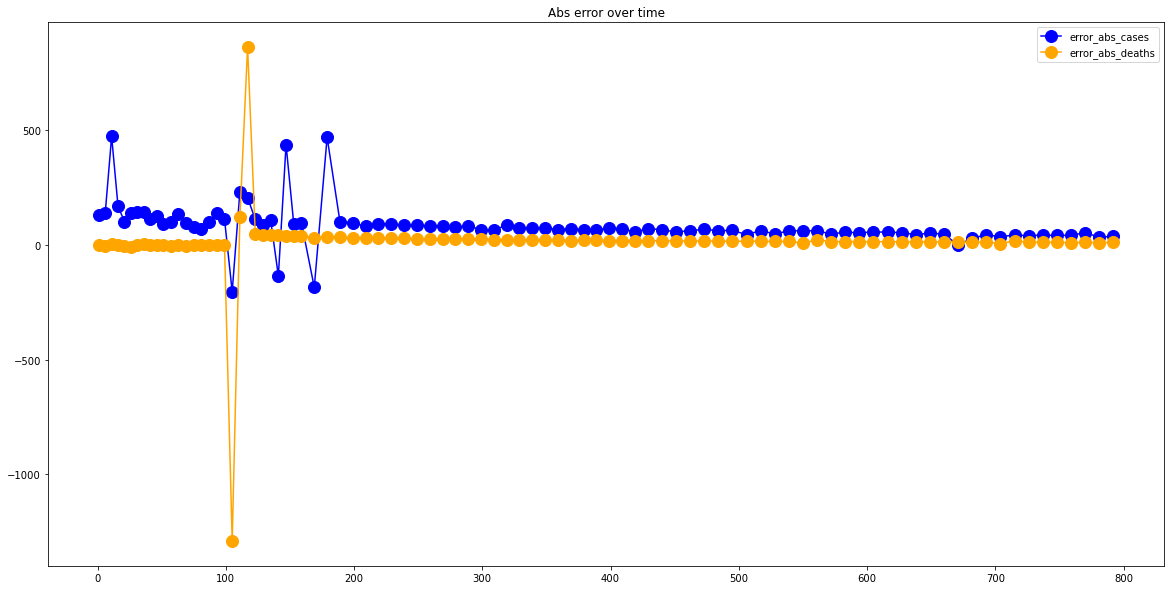

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  859.1639344262295
RMSE =  1197.9061034934605
-- United Kingdom performances for deaths --
MAPE =  268.91803278688525
RMSE =  624.4377930403069


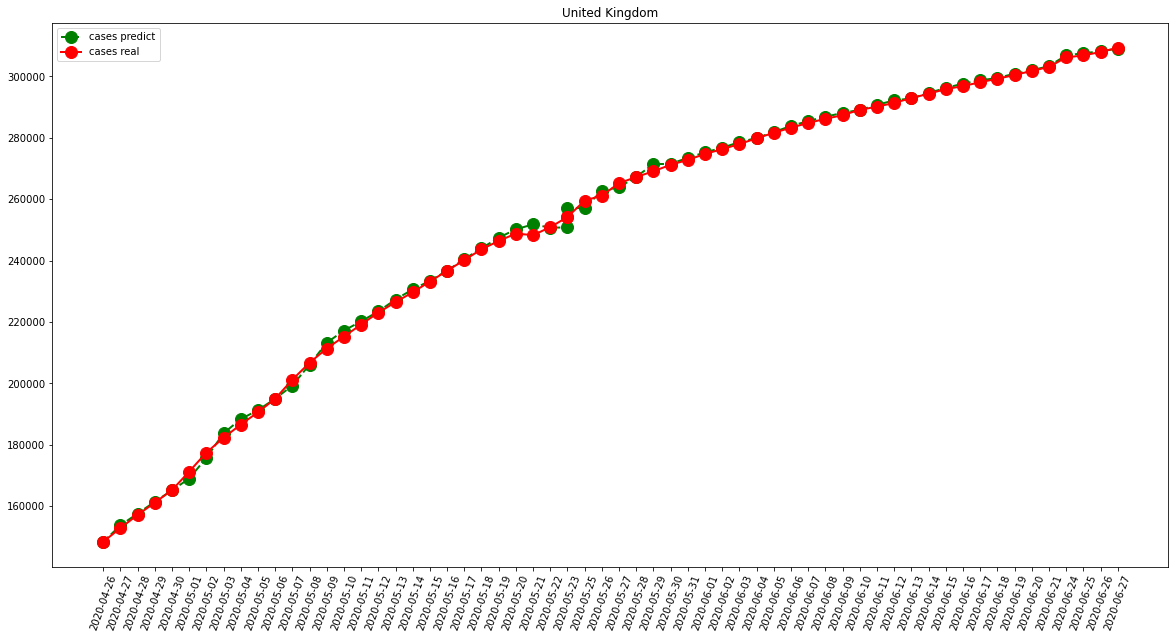

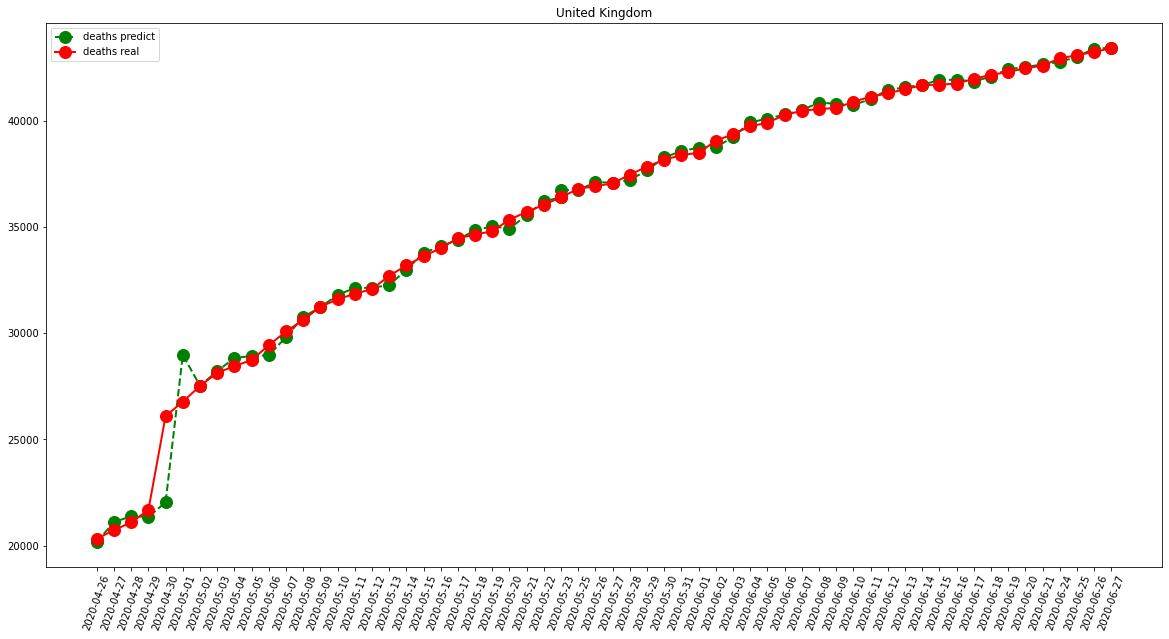

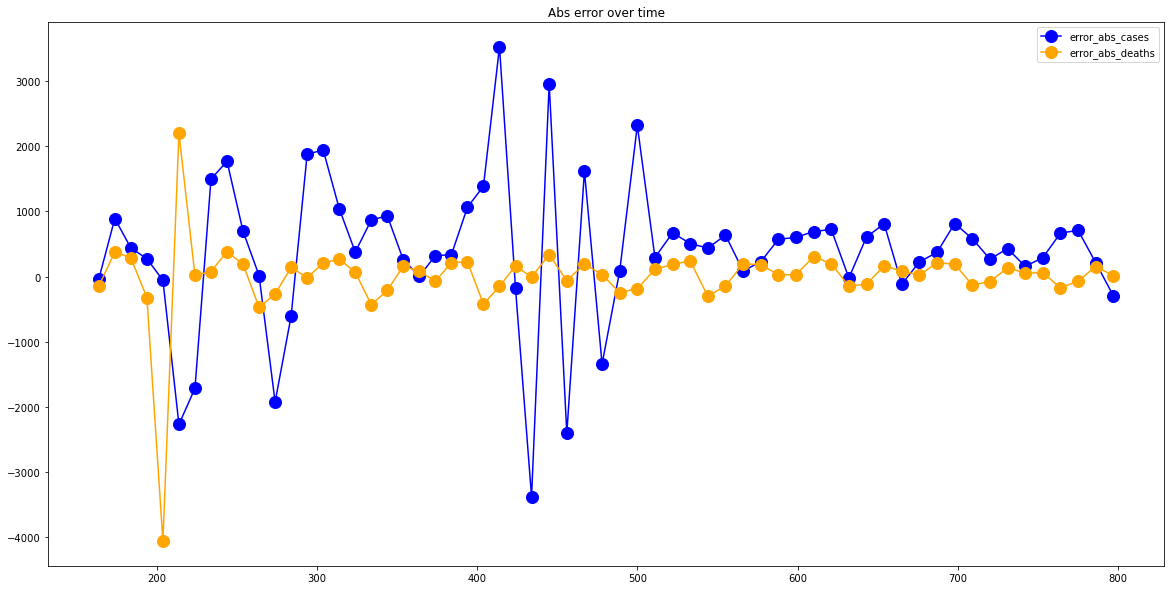

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  317.21311475409834
RMSE =  456.73947806125994
-- Germany performances for deaths --
MAPE =  34.75409836065574
RMSE =  55.407876578021344


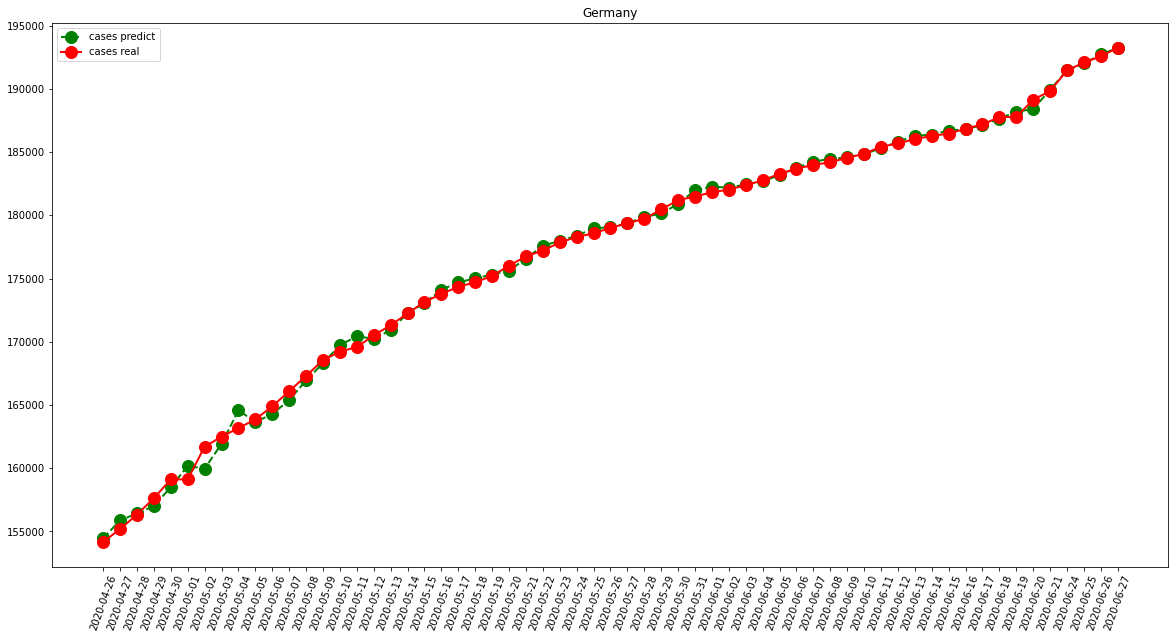

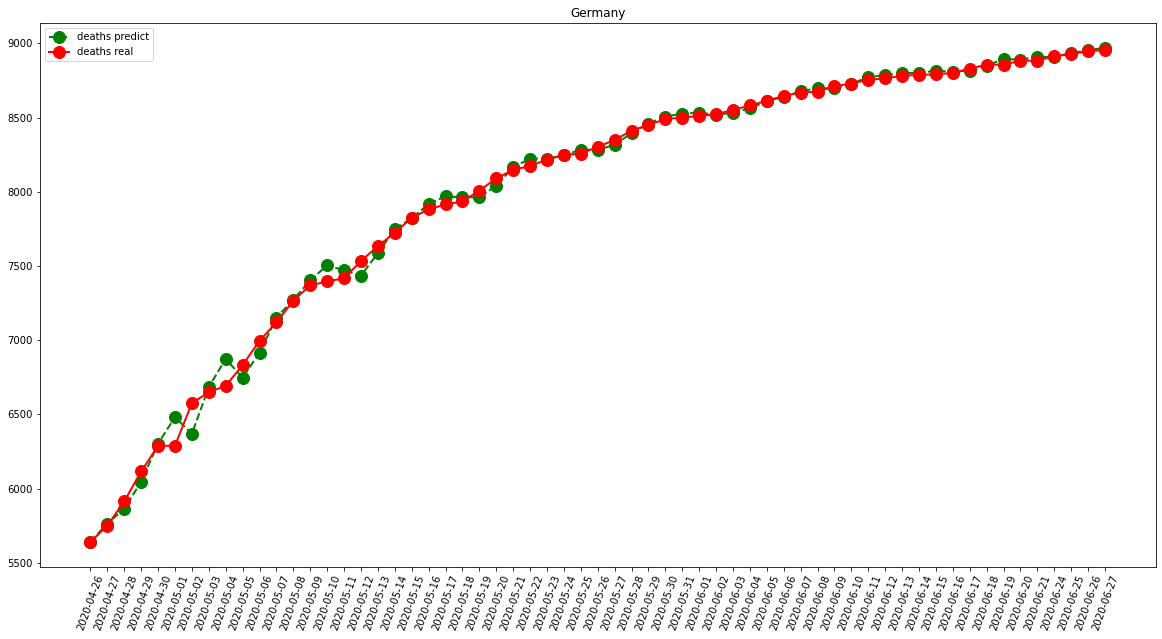

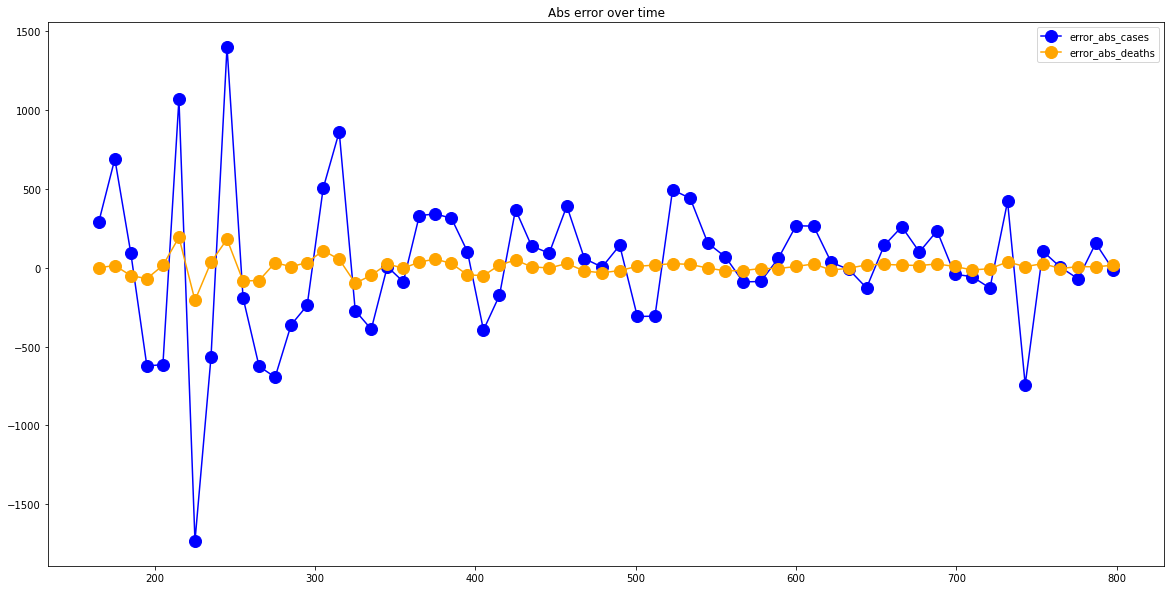

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  251.62295081967213
RMSE =  330.92094544036877
-- Iran performances for deaths --
MAPE =  14.704918032786885
RMSE =  22.45323007906895


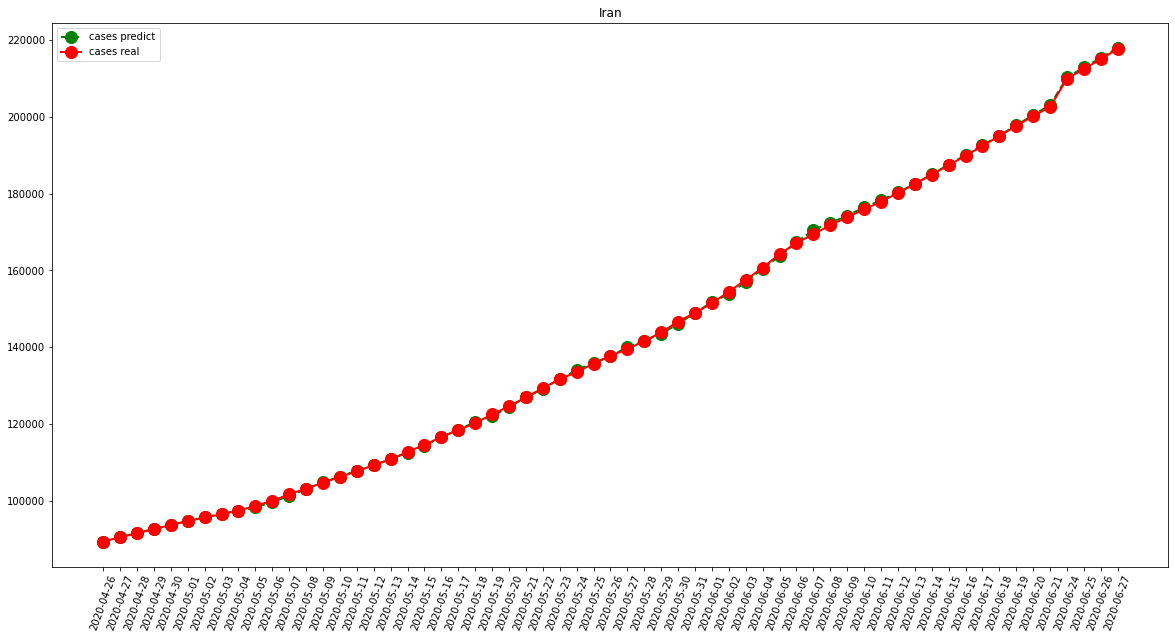

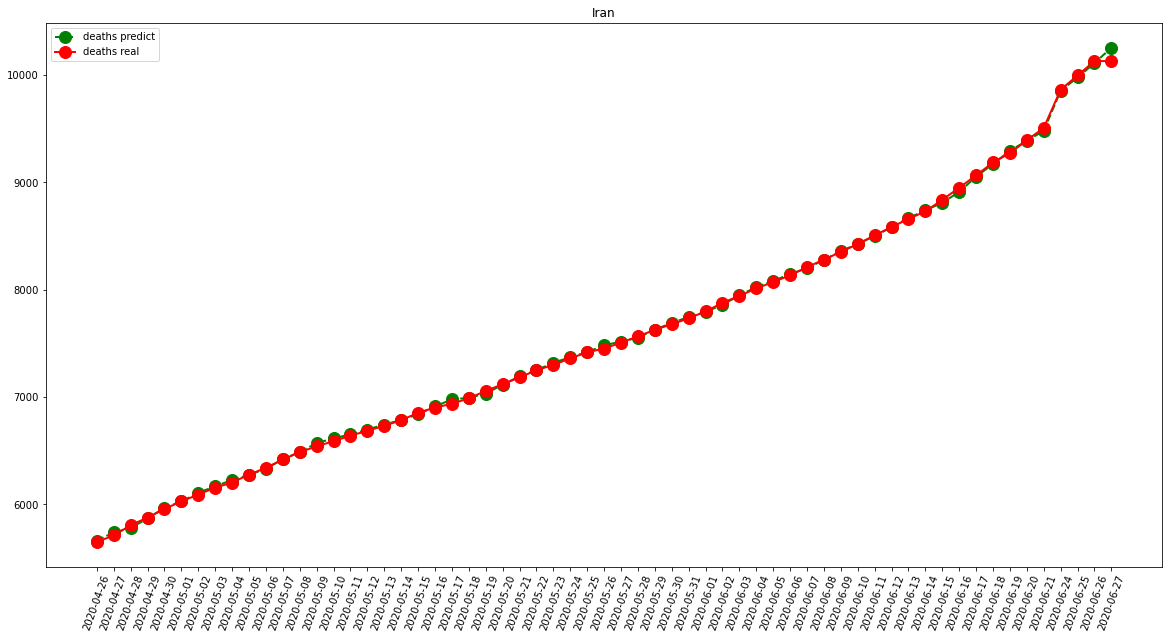

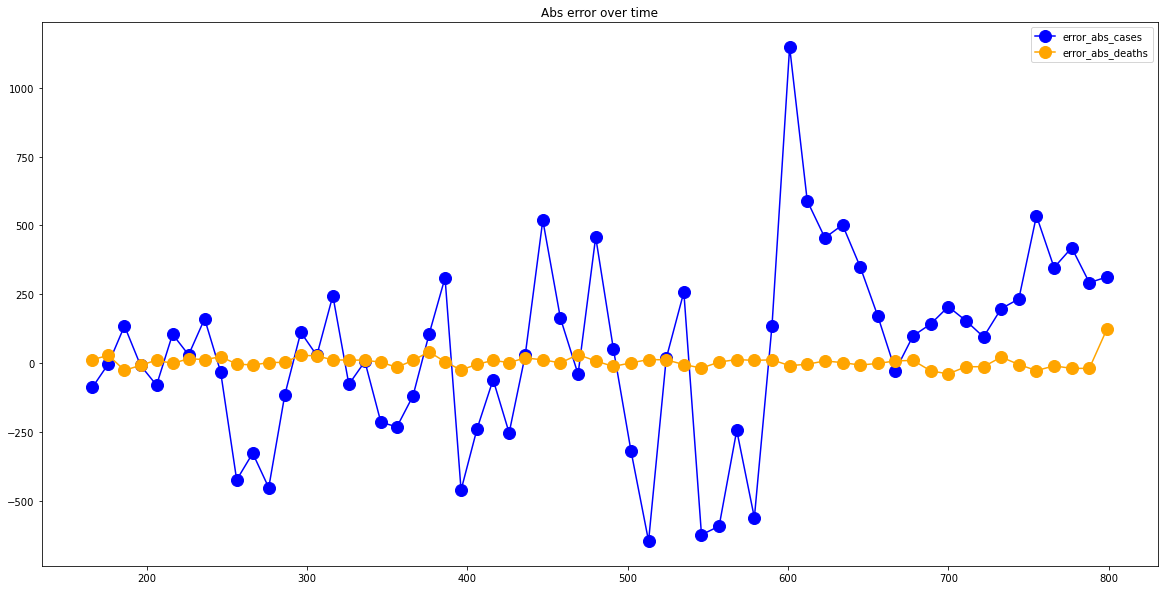

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  297.5409836065574
RMSE =  439.0519219453827
-- Turkey performances for deaths --
MAPE =  29.770491803278688
RMSE =  129.95610860569204


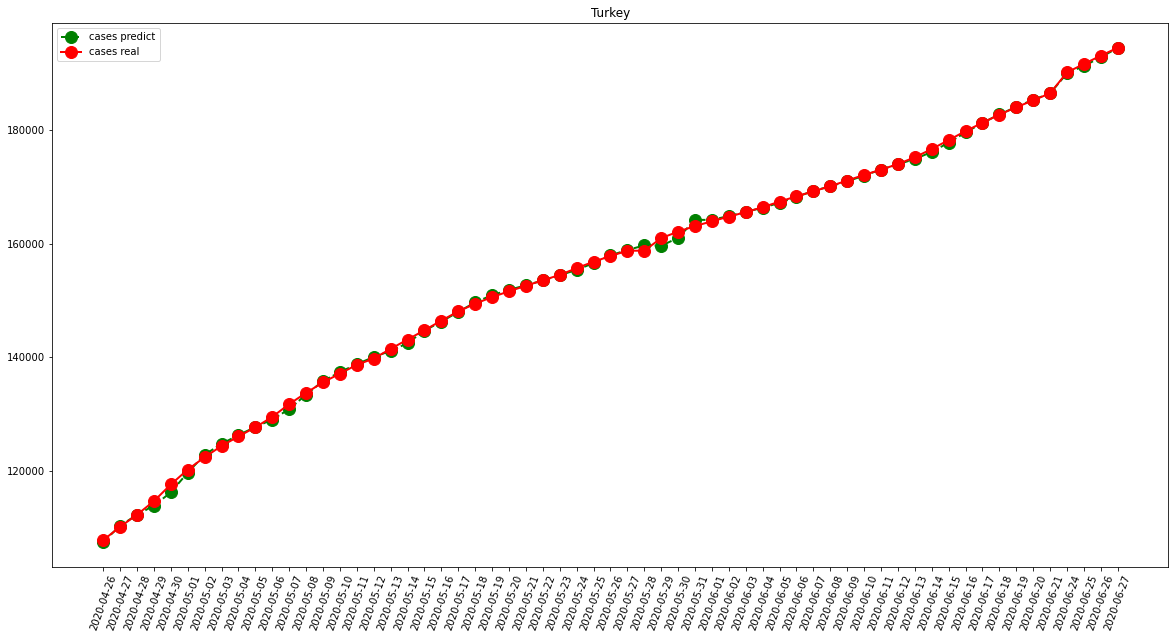

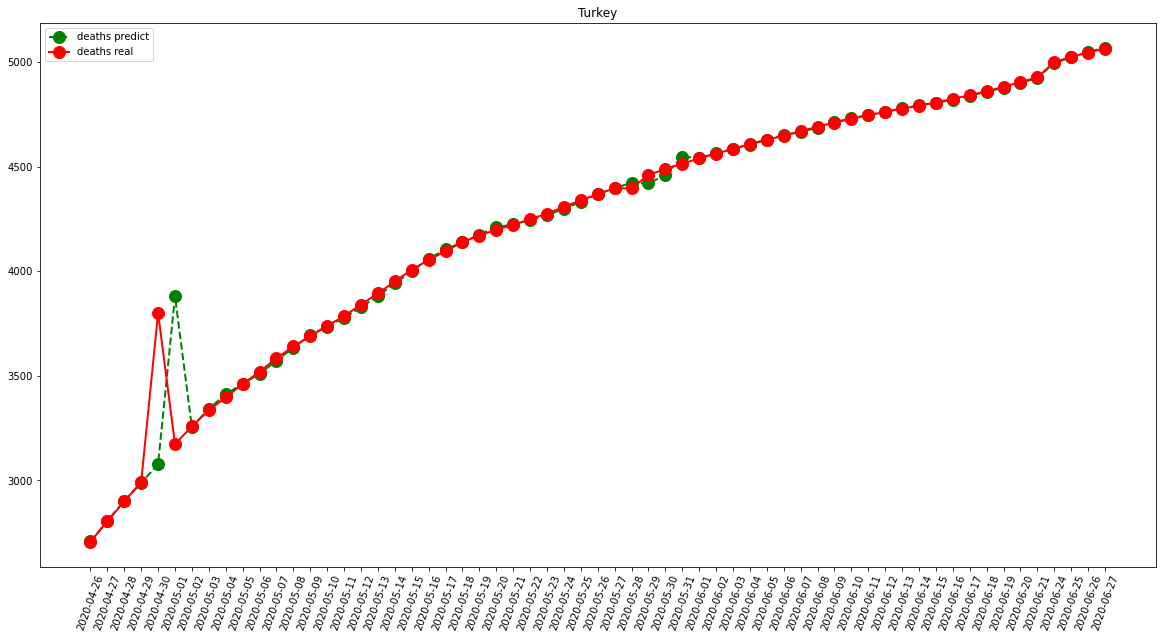

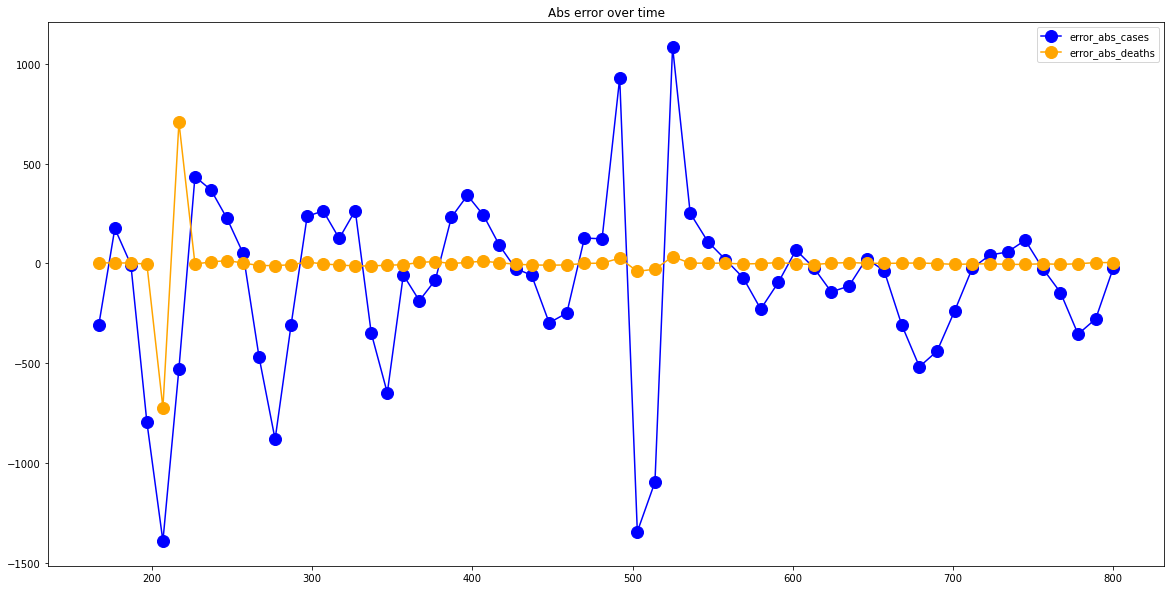

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  8182.617647058823
RMSE =  10726.087191570674
-- Brazil performances for deaths --
MAPE =  380.3235294117647
RMSE =  471.4035051904921


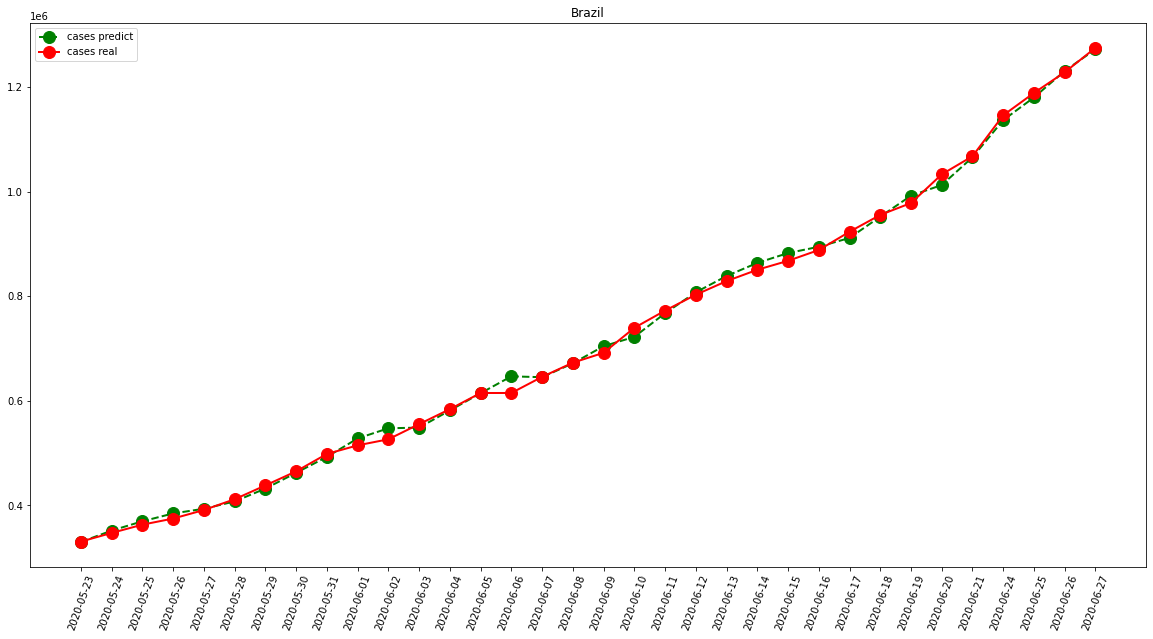

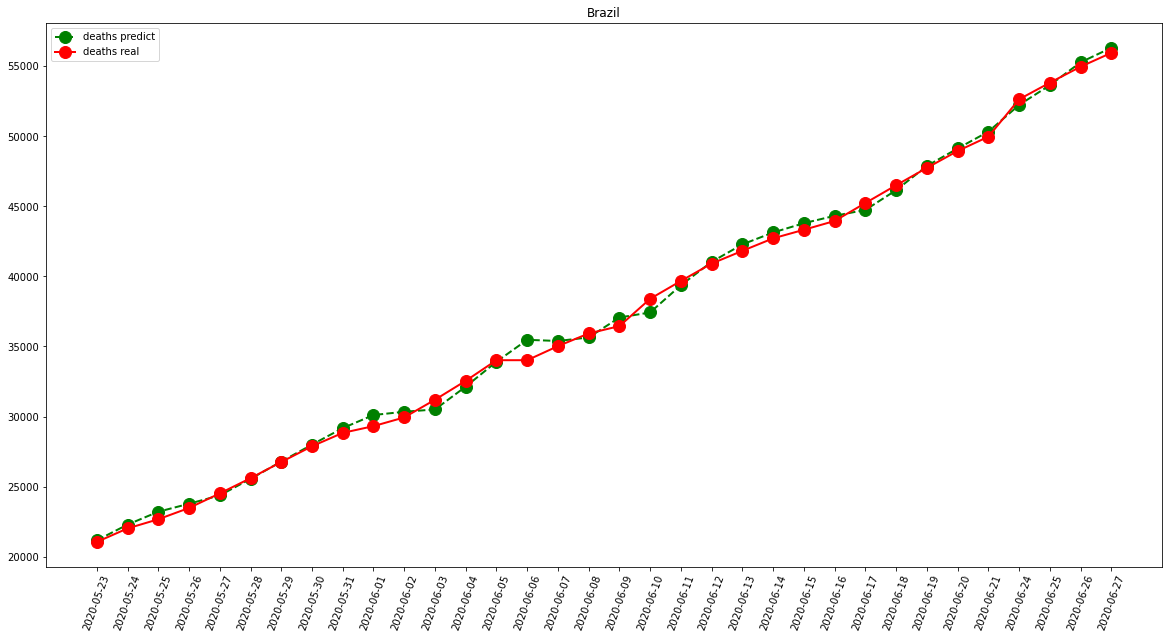

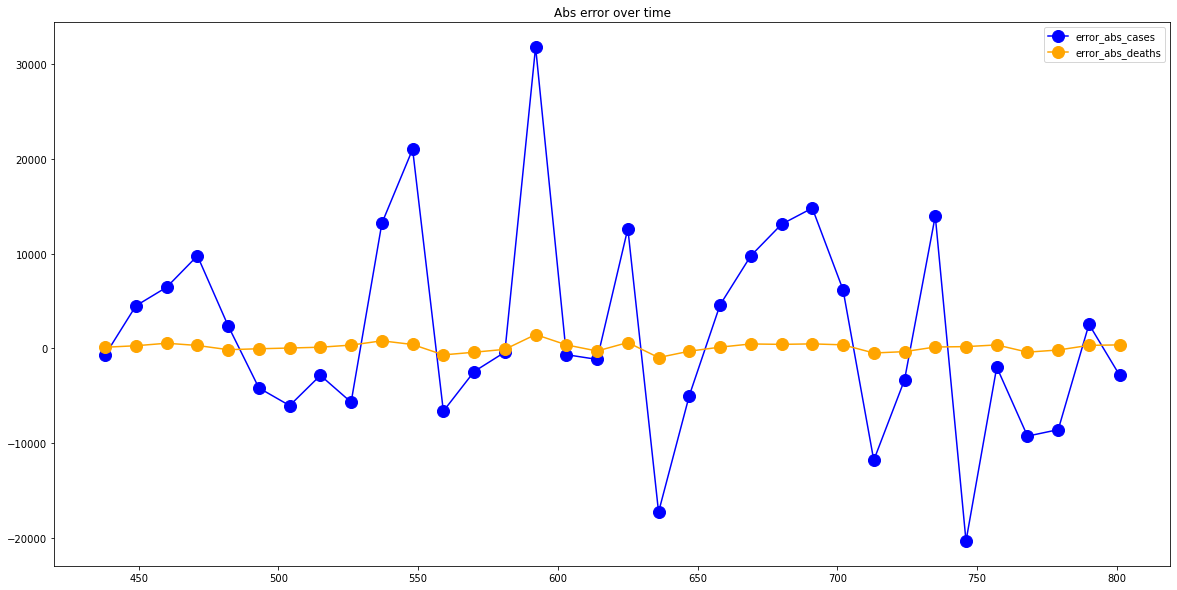

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)